### Descriptive Analytics for Numerical Columns
Objective :- To compute and analyze basic statistical measures for numerical columns in the dataset.

In [76]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [49]:
df=pd.read_csv("sales_data_with_discounts.csv")

In [50]:
df.shape

(450, 13)

In [51]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [52]:
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [55]:
df.select_dtypes(['int','float']).columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [56]:
cols=df.select_dtypes(['int','float']).columns

In [57]:
cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

#### Mean

In [58]:
df[cols].mean()

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

#### Median

In [59]:
df[cols].median()

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

#### Mode

In [60]:
df[cols].mode()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,3.0,400.0,24300.0,5.007822,69.177942,326.974801
1,NaN,450.0,NaN,5.055218,73.025199,330.822058
2,NaN,500.0,NaN,5.059801,93.649161,466.350839
3,NaN,1300.0,NaN,5.072124,94.682735,485.317265
4,NaN,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...
445,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


#### Standard Deviation

In [61]:
df[cols].std()

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

## Data Visualization
Objective :- To visualize the distribution and relationship of numerical and categorical variables in the dataset.

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Histograms

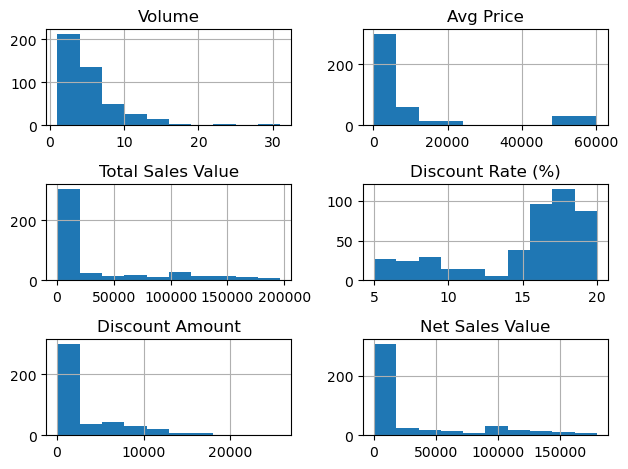

In [63]:
df.hist()
plt.tight_layout()

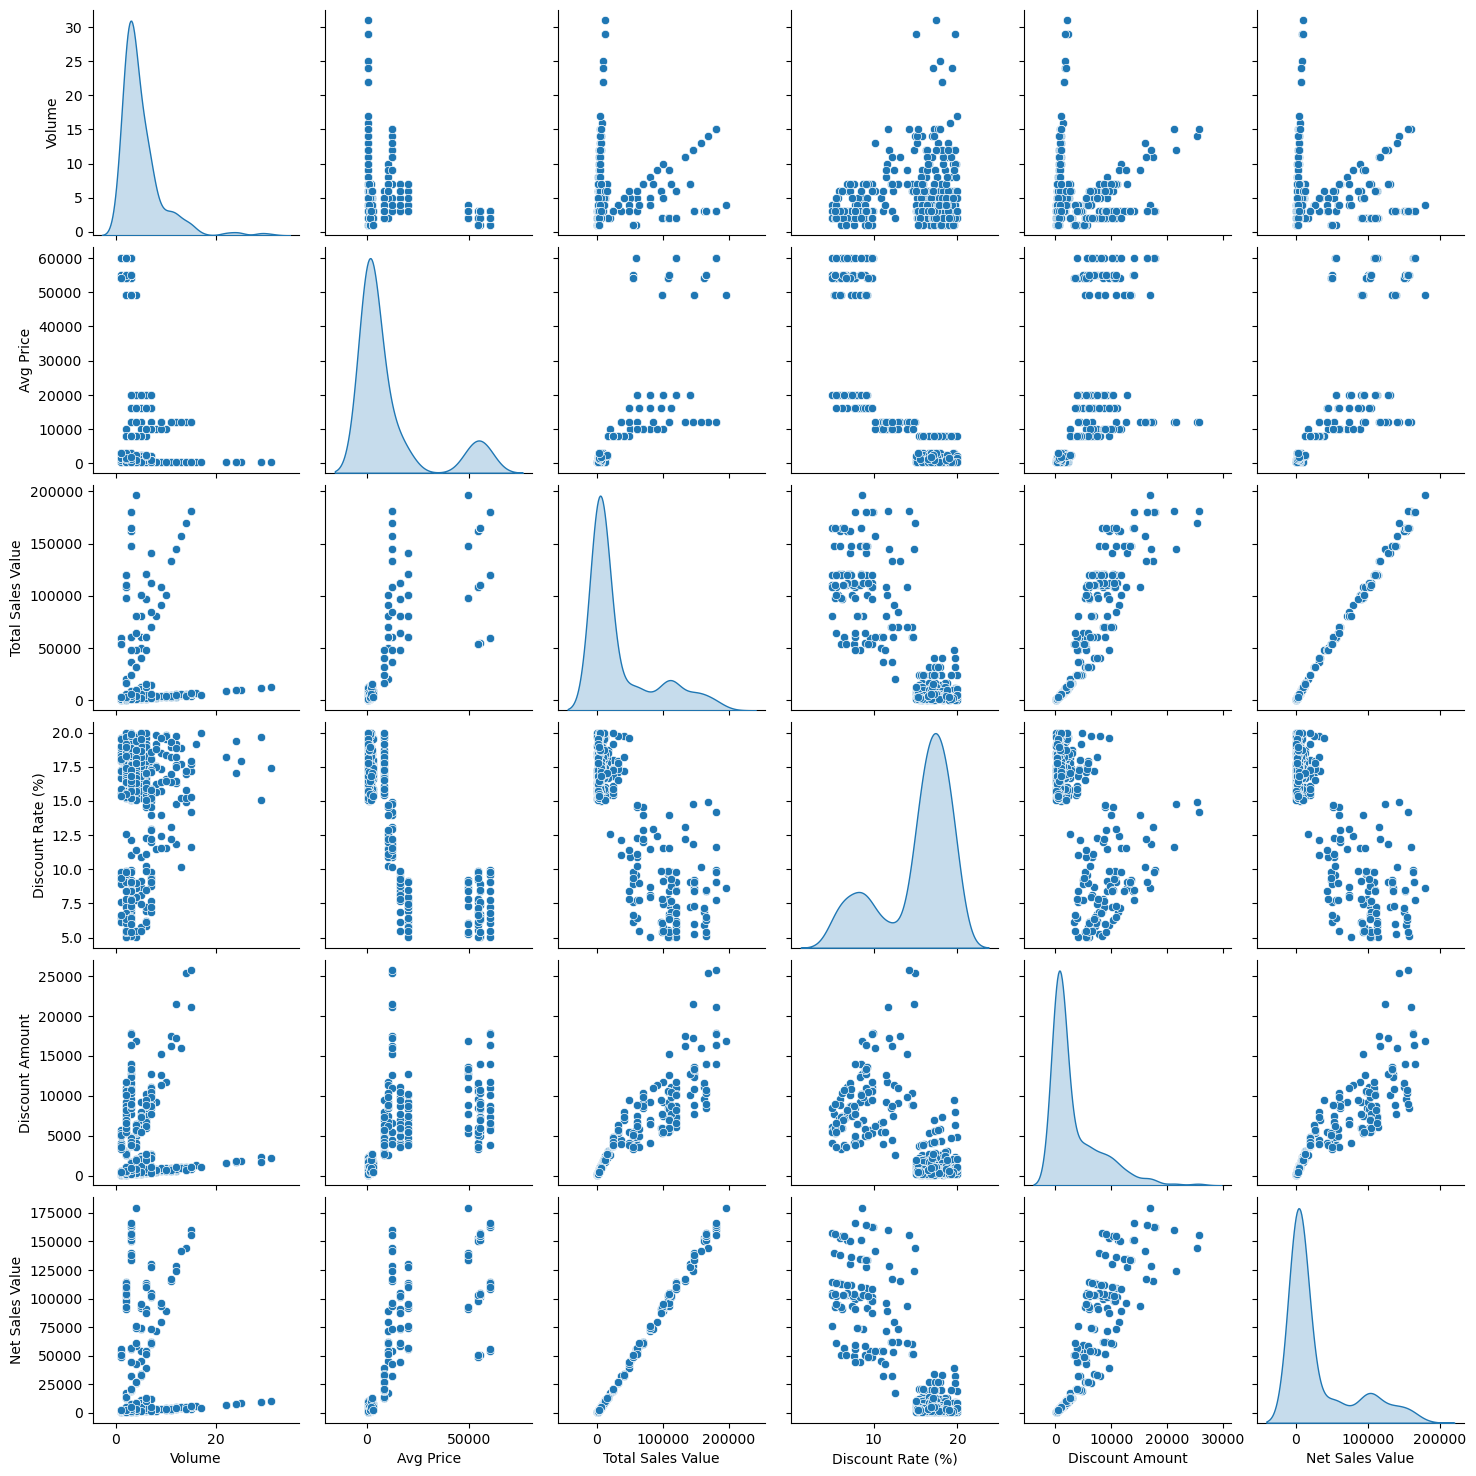

In [64]:
sns.pairplot(df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value']],diag_kind='kde')

#### Boxplot

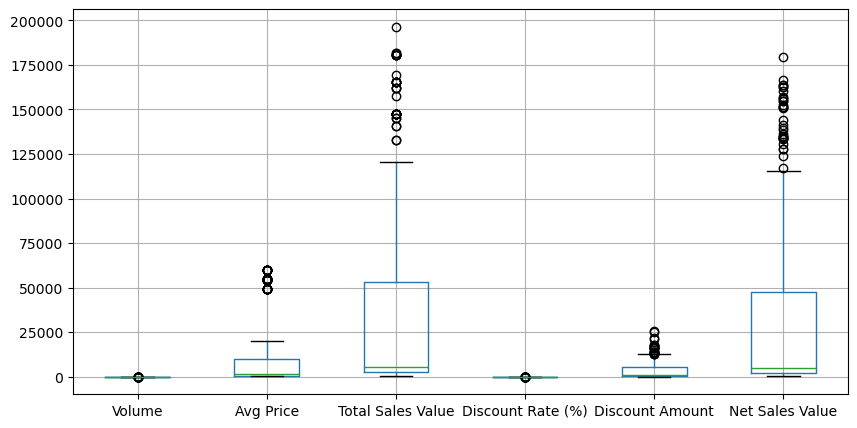

In [66]:
df.boxplot(figsize=(10,5))
plt.show()

In [67]:
# Here there are outliers so we should remove it
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

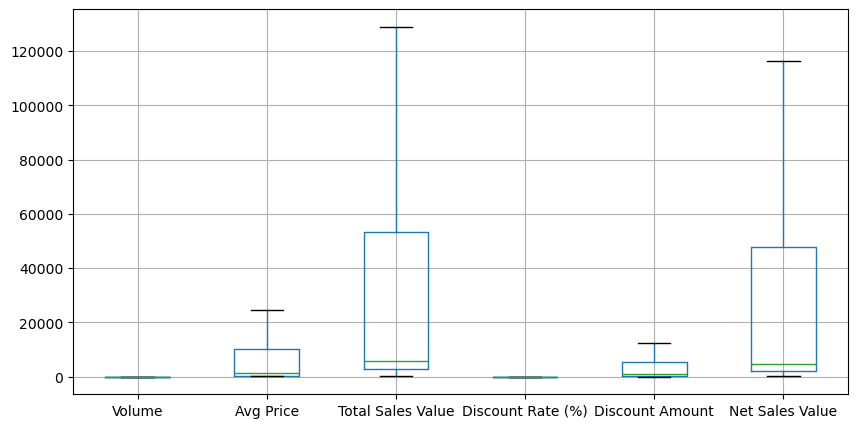

In [68]:
df.boxplot(figsize=(10,5))
plt.show()

#### Bar Chart

In [73]:
cols1=df.select_dtypes(['object','category']).columns
cols1

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [72]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume               float64
BU                    object
Brand                 object
Model                 object
Avg Price            float64
Total Sales Value    float64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

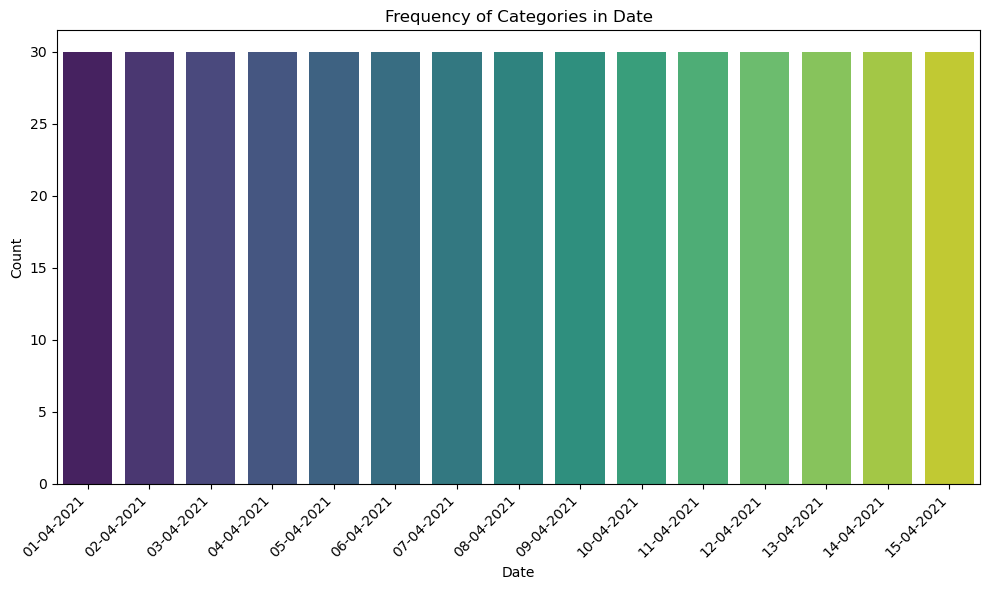

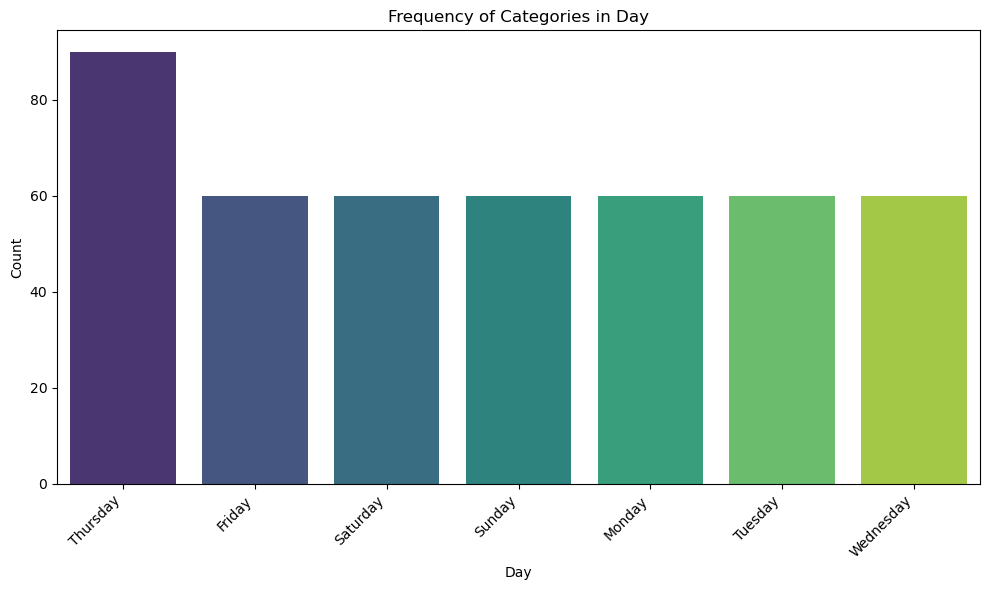

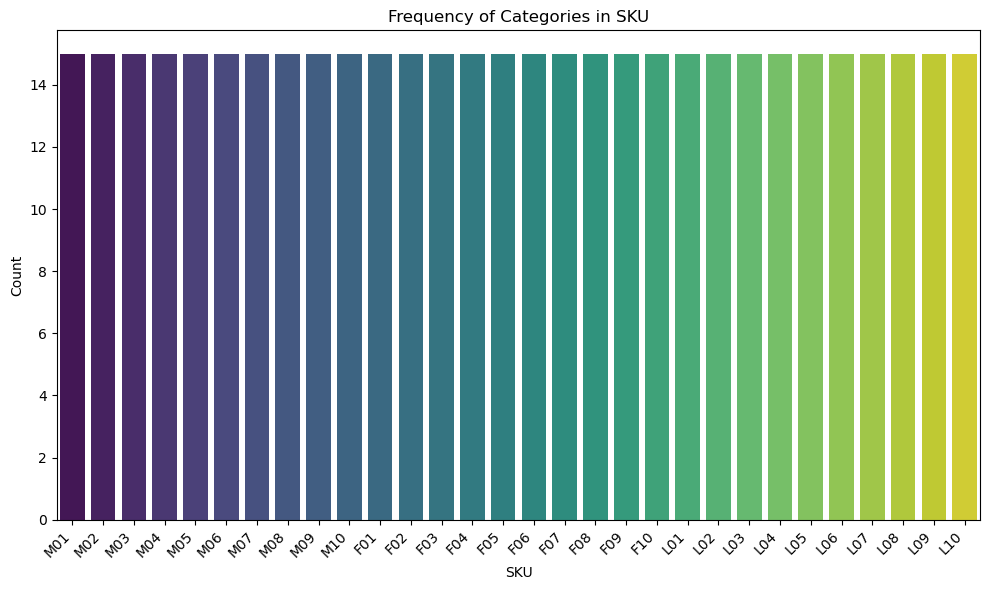

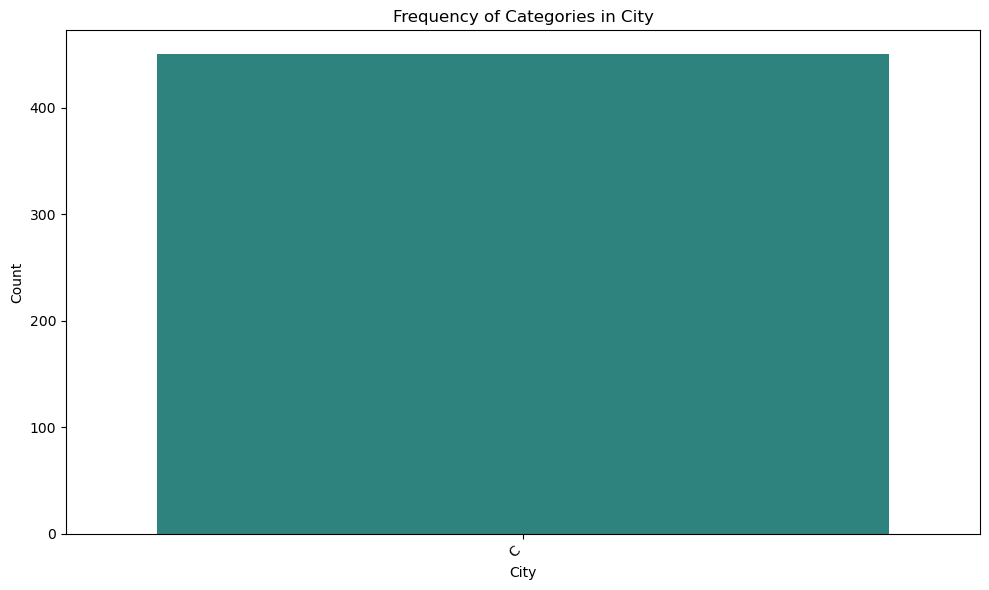

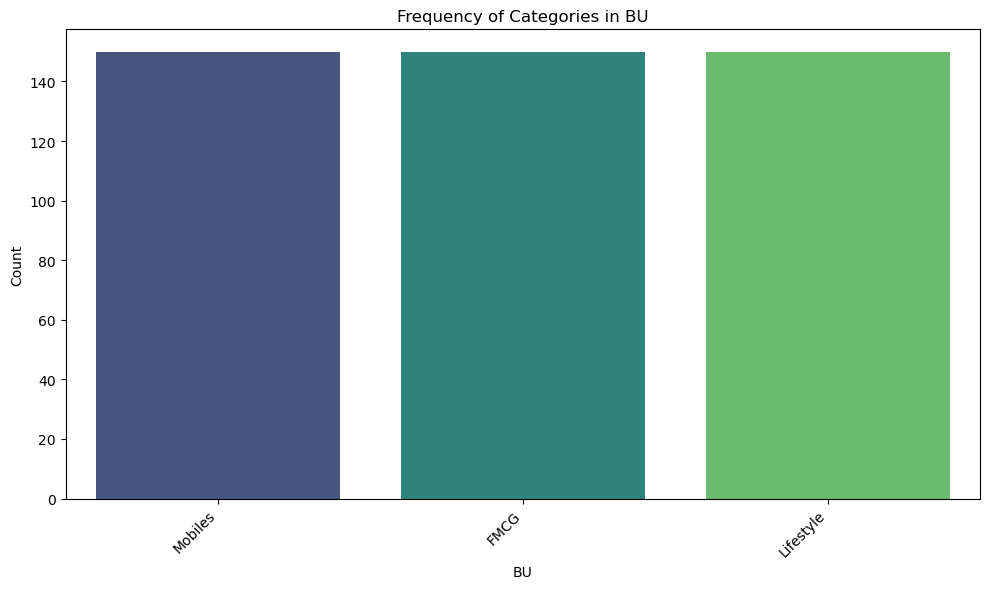

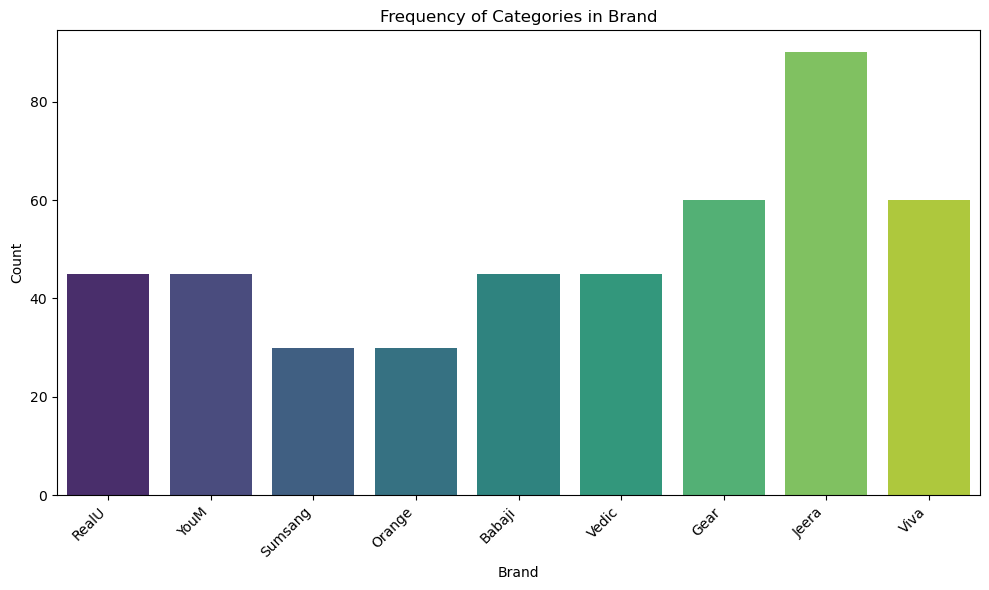

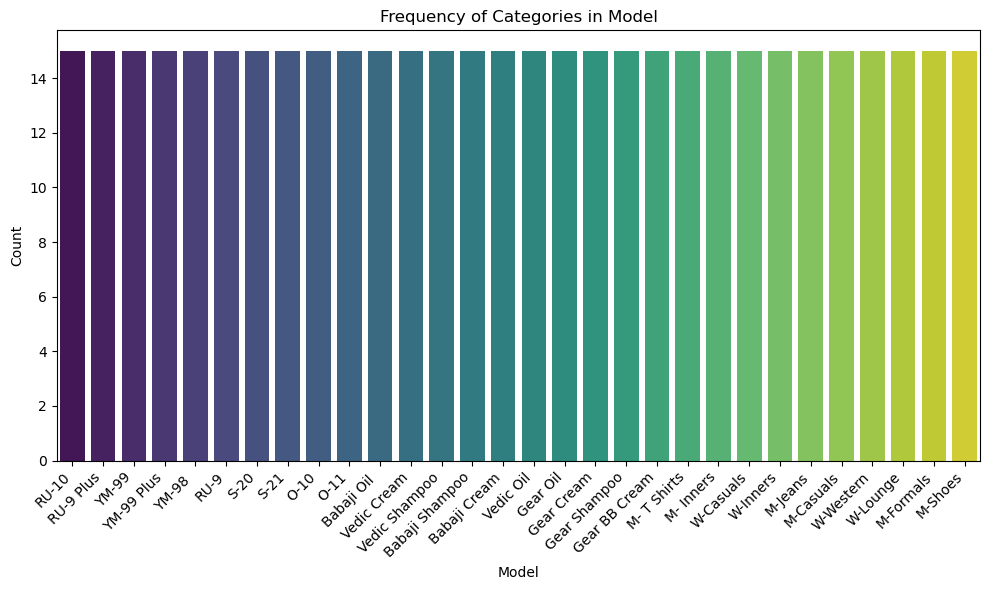

In [80]:
for col in cols1:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Frequency of Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()